# Image Classification **Using CNN** 


By : Ketata Mahmoud&Lajili Khaled &Ghorbel Ilyes

---


we'll build a CNN using Keras to use it binary classifying pictures in 2 different categories : **Trash**/ 
             **Not Trash**

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/trash_data.zip

Archive:  /content/drive/MyDrive/trash_data.zip
   creating: data/train/
   creating: data/train/not_trash/
  inflating: data/train/not_trash/6000046.jpg  
  inflating: data/train/not_trash/6000047.jpg  
  inflating: data/train/not_trash/6000048.jpg  
  inflating: data/train/not_trash/6000049.jpg  
  inflating: data/train/not_trash/6000050.jpg  
  inflating: data/train/not_trash/6000051.jpg  
  inflating: data/train/not_trash/6000052.jpg  
  inflating: data/train/not_trash/6000053.jpg  
  inflating: data/train/not_trash/6000054.jpg  
  inflating: data/train/not_trash/6000055.jpg  
  inflating: data/train/not_trash/6000056.jpg  
  inflating: data/train/not_trash/6000057.jpg  
  inflating: data/train/not_trash/6000058.jpg  
  inflating: data/train/not_trash/6000059.jpg  
  inflating: data/train/not_trash/6000060.jpg  
  inflating: data/train/not_trash/6000061.jpg  
  inflating: data/train/not_trash/6000062.jpg  
  inflating: data/train/not_trash/6000063.jpg  
  inflating: data/train/not_

In [ ]:
import os,shutil
print('total training Trash images:', len(os.listdir('/content/data/train/not_trash')))

total training Trash images: 391


In [ ]:
import os,shutil
print('total training NOT Trash images:', len(os.listdir('/content/data/train/not_trash')))

total training NOT Trash images: 391


In [ ]:
import os,shutil
print('total Val Trash images:', len(os.listdir('/content/data/val/trash')))

total Val Trash images: 227


In [ ]:
import os,shutil
print('total Val NOT Trash images:', len(os.listdir('/content/data/val/not_trash')))

total Val NOT Trash images: 192


In [ ]:
base_dir = '*/*.JPG'
train_dir = '/content/data/train'
validation_dir = '/content/data/val'
#test_dir = '/content/data/TEST'

# The Model

In [ ]:
from keras import layers # Keras = Framework = ensembles de fonctions prédéfinies pour implémenter les couches de CNN
# Implémenter la convolution, pooling, relu et le fully connected 
from keras import models  # Pour créer le sockle qui va transporeter CNN - sequantial()
from keras.layers import Dropout,MaxPooling2D,Dense,Flatten,Conv2D ;# Dense = Fully connected
model = models.Sequential() # préparer le support de l'architecture CNN
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5)) 
model.add(layers.Flatten())
model.add(Dropout(0.8)) 
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Afficher l'architecture 

In [ ]:
model.summary() # Afficher l'architecture 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 225, 225, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 55, 55, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 193600)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 193600)            0

# **Data Augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator # BIBILIOTHEQUE POUR L'AUGEMENTATION DE DONNEES
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalisation
    rotation_range=3, # Rotation de chaque image avec +10 et -10 degrè
    zoom_range=0.0, # Zoom du centre pour prendre 40% de la totalité 
    horizontal_flip=True, # Tourner l'image sur l'axe horiztonal
    vertical_flip=True, # Tourner l'image selon l'axe vertical 
    fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(227, 227),
        batch_size=4,
        class_mode='binary')
validation_generator = Val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=4,
        class_mode='binary')

Found 909 images belonging to 2 classes.
Found 419 images belonging to 2 classes.


# **Convolution Neural Network Learning**

In [ ]:
from keras.optimizers import Adam
nb_train_samples = 909   
nb_validation_samples = 419   
epochs =20 # Nombre de backward et forward pass df el base de données c le nombre d'apprentissage de la base sur notre architecture
batch_size = 2 # Après chaque deux images faire la mise à jour depids de l'architecture 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(
            train_generator,
            steps_per_epoch=30//batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
15/15 [==============================] - 119s 7s/step - loss: 0.9918 - accuracy: 0.6352 - val_loss: 0.6668 - val_accuracy: 0.5418
Epoch 2/20
15/15 [==============================] - 20s 1s/step - loss: 0.7473 - accuracy: 0.6304
Epoch 3/20
15/15 [==============================] - 21s 1s/step - loss: 0.7569 - accuracy: 0.4861
Epoch 4/20
15/15 [==============================] - 21s 1s/step - loss: 0.6760 - accuracy: 0.7282
Epoch 5/20
15/15 [==============================] - 21s 1s/step - loss: 0.6176 - accuracy: 0.7201
Epoch 6/20
15/15 [==============================] - 20s 1s/step - loss: 0.4671 - accuracy: 0.8584
Epoch 7/20
15/15 [==============================] - 21s 1s/step - loss: 1.2869 - accuracy: 0.5774
Epoch 8/20
15/15 [==============================] - 21s 1s/step - loss: 0.8191 - accuracy: 0.5579
Epoch 9/20
15/15 [==============================] - 20s 1s/step - loss: 0.8366 - accuracy: 0.5231
Epoch 10/20
15/15 [==============================] - 21s 1s/step - loss: 0.

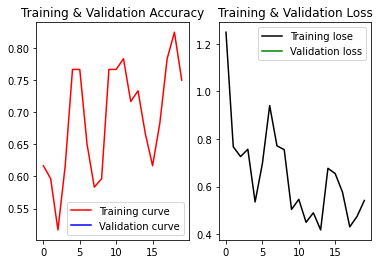

In [ ]:
import matplotlib.pyplot as plt # Bibliothèque de représentation des courbes
# print(history.history.keys()) ---> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'red', label='Training curve')
plt.plot(history.history['val_accuracy'], 'blue', label='Validation curve')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'black', label='Training lose')
plt.plot(history.history['val_loss'], 'green', label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')
plt.show()


##**Predict**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
def read_image(path):
    img = plt.imread(path)
    resized_img = cv2.resize(img, (227,227))
    return resized_img


## **Test the Not Trash data**

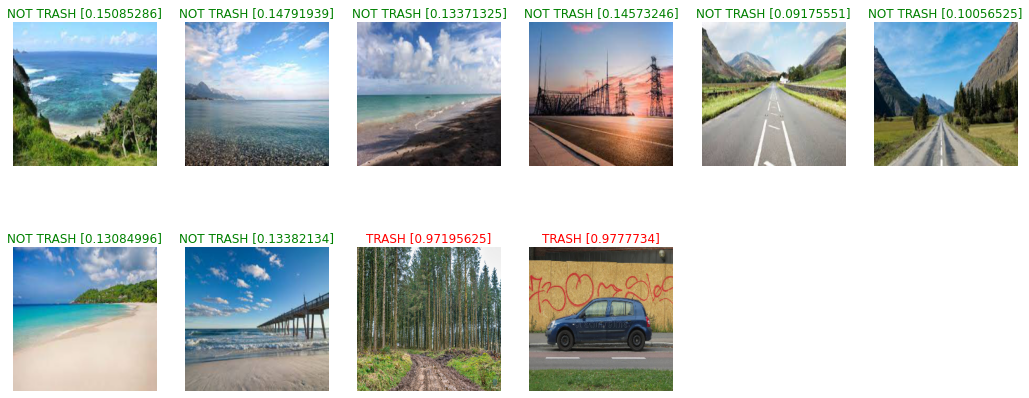

In [ ]:
import os
PREDICT_DIR = '/content/drive/MyDrive/test/Not Trash/'
predicts_img = []
porc=0
for img_name in os.listdir(PREDICT_DIR):
    predicts_img.append(read_image(os.path.join(PREDICT_DIR, img_name)))
predicts_img = np.array(predicts_img)
predictions = model.predict(predicts_img)
fig=plt.figure(figsize=(18,20))
for i in range(len(predictions)):
      fig.add_subplot(5, 6, i + 1)
      plt.imshow(predicts_img[i])
      if predictions[i] < 0.5:
        plt.title('This is the title', color = 'g')
        plt.title('NOT TRASH '+str(predictions[i]))
   
      else:
        plt.title('This is the title', color = 'r')
        plt.title('TRASH '+str(predictions[i]))
        porc+=1
      plt.axis('off') 
      a=(porc/len(predictions))*100
      



## **Test the Not Trash data** (pourcentage)

1.   erreur
2.   succès



In [ ]:
print("pourcentage d'erreur= "+str(a)+" %")
print("pourcentage d'succès= "+str(100-a)+" %")

pourcentage d'erreur= 20.0 %
pourcentage d'erreur= 80.0 %


## **Test the Not Trash data**

pourcentage d'erreur= 16.666666666666664%


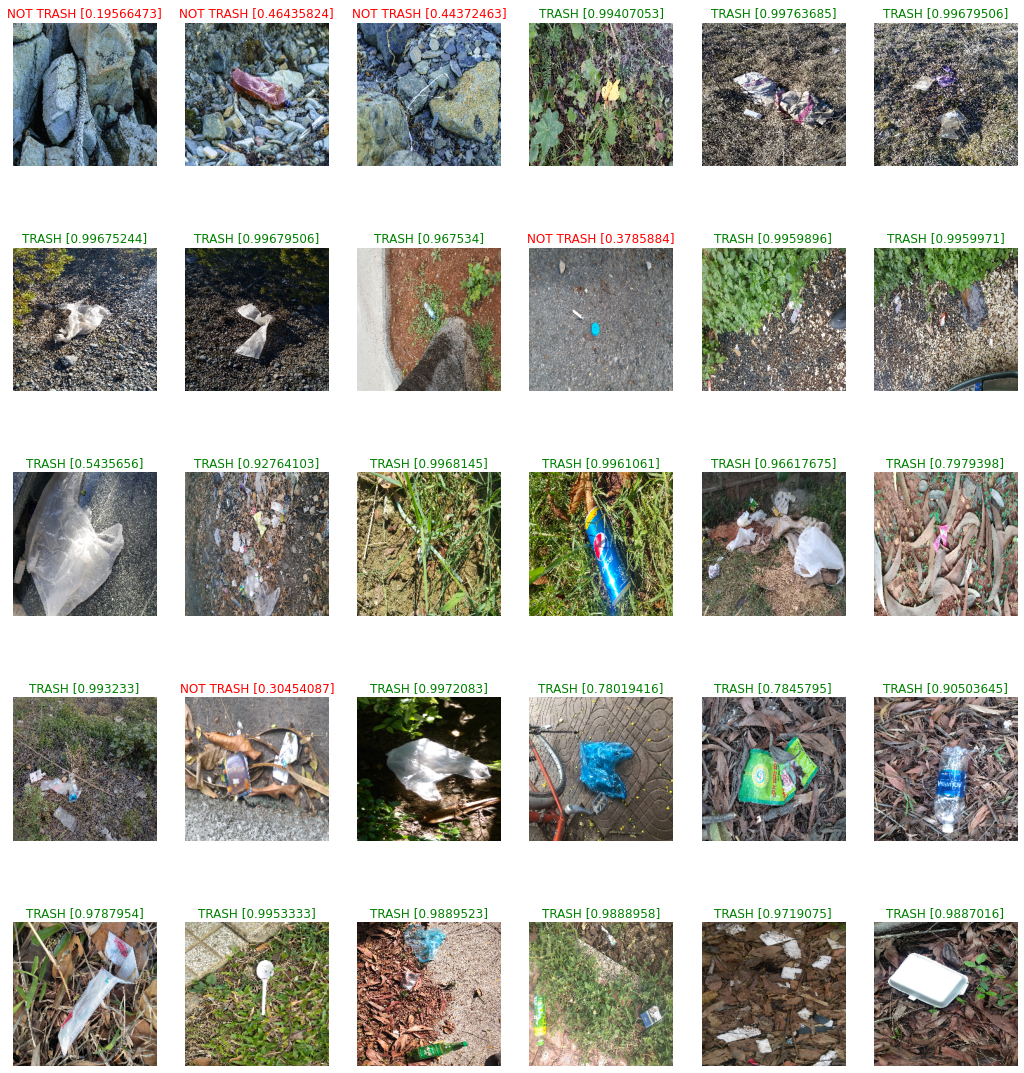

In [ ]:
PREDICT_DIR = '/content/drive/MyDrive/test/trash/'
predicts_img = []
porc=0
for img_name in os.listdir(PREDICT_DIR):
    predicts_img.append(read_image(os.path.join(PREDICT_DIR, img_name)))
predicts_img = np.array(predicts_img)
predictions = model.predict(predicts_img)
fig=plt.figure(figsize=(18,20))
for i in range(len(predictions)):
      fig.add_subplot(5, 6, i + 1)
      plt.imshow(predicts_img[i])
      if predictions[i] < 0.5:
        plt.title('This is the title', color = 'r')
        plt.title('NOT TRASH '+str(predictions[i]))
        porc+=1
      else:
        plt.title('This is the title', color = 'g')
        plt.title('TRASH '+str(predictions[i]))
        
      plt.axis('off')   
      a=(porc/len(predictions))*100



## **Test the Trash data** (pourcentage)

1.   erreur
2.   succès



In [ ]:
print("pourcentage d'erreur= "+str(a)+" %")
print("pourcentage d'erreur= "+str(100-a)+" %")

pourcentage d'erreur= 16.666666666666664%
pourcentage d'erreur= 83.33333333333334%
